In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score 

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabUser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file_path = "C:\\Users\\LabUser\\Downloads\\archive (2)\\WELFake_Dataset.csv" 
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


In [4]:
print(df.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [5]:
df = df.dropna()
print(df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [8]:
X = df.drop(columns=['label'])
y = df['label']

In [9]:
X.head()

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...


In [10]:
y.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [11]:
print(X.shape)
print(y.shape)

(71537, 2)
(71537,)


<Axes: ylabel='count'>

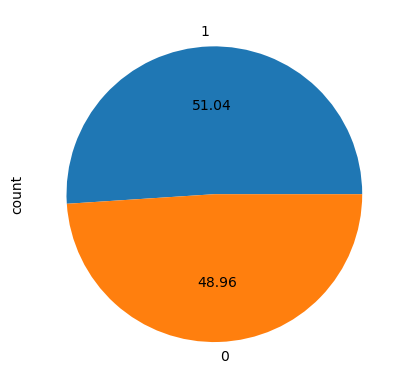

In [12]:
# 0 - Fake, 1 - Real
df['label'].value_counts().plot.pie(autopct='%.2f')

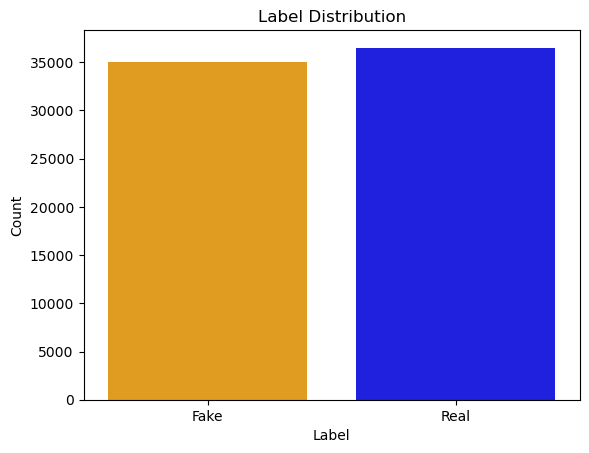

In [13]:
# Count plot for label distribution
sns.countplot(data=df, x='label', hue='label', legend=False, palette=['orange', 'blue'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.ylabel('Count')
plt.show()

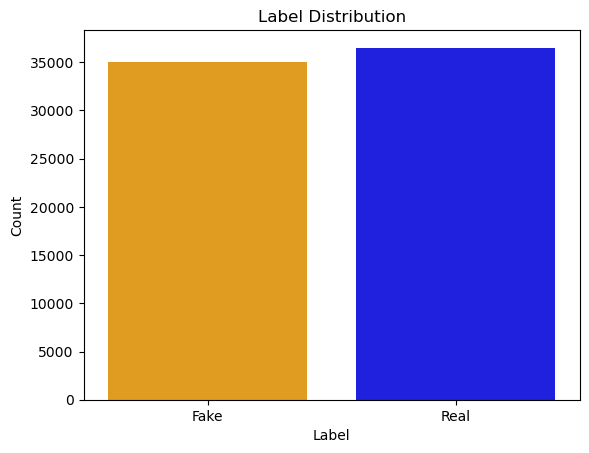

In [14]:
# Count plot for label distribution
sns.countplot(data=df, x='label', hue='label', palette=['orange', 'blue'], legend=False)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.ylabel('Count')
plt.show()


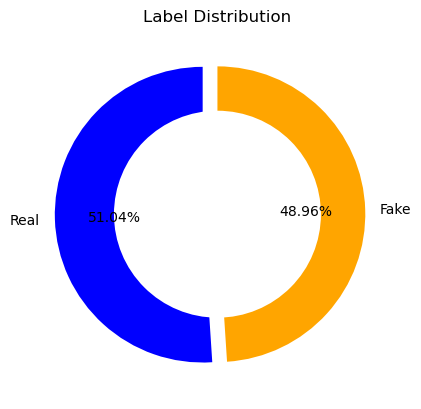

In [15]:
# Donut plot for label distribution
sizes = df['label'].value_counts()
colors = ['blue', 'orange']
explode = (0.1, 0)  # explode the first slice

plt.pie(sizes, labels=['Real', 'Fake'], autopct='%.2f%%', startangle=90, colors=colors, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Label Distribution')
plt.show()

In [16]:
# Vocab_size = Unique words in our Corpus (entire document)
vocab_size = 10000

In [17]:
messages = X.copy()

# Reset the index to avoid errors caused by using dropna() earlier
messages.reset_index(inplace=True)
print(messages['title'][1])

UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]


In [18]:
### Text Preprocessing ###
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Create an instance of the CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = cv.fit_transform(corpus)
print(dtm.shape)


# Inspect the corpus
print(corpus[:30])

# Calculate the maximum sentence length
max_length = max(len(sentence.split()) for sentence in corpus)
print("Maximum sentence length:", max_length)

# Convert Text to One Hot Representation and Add Padding
onehot_repr = [one_hot(words, vocab_size) for words in corpus]
print(onehot_repr[:5])

sentence_length = 50
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sentence_length)
print(embedded_docs)

(71537, 7799)
['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video', 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video', 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid', 'satan russia unv imag terrifi new supernuk western world take notic', 'time christian group sue amazon splc design hate group', 'dr ben carson target ir never audit spoke nation prayer breakfast', 'hous intel chair trump russia fake stori evid anyth video', 'sport bar owner ban nfl game show true american sport like speak rural america video', 'latest pipelin leak underscor danger dakota access pipelin', 'gop senat smack punchabl alt right nazi internet', 'may brexit offer would hurt cost eu citizen eu parliament', 'schumer call trump appoint offici overse puerto rico relief', 'watch hilari ad call question health age clinton crime famili boss', 'chang expect espn polit agenda despit huge subscrib declin breitbart

In [19]:
### LDA Integration ###
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = count_vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Print the top 15 words for each topic
for index, topic in enumerate(lda.components_):  
    print(f'The Top 15 Words For Topic #{index + 1}') 
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])  
    print('\n')
    
# Transform our DTM 
topic_results = lda.transform(dtm)

# Adding Topic Labels
topic_labels = { 
    1: 'Entertainment', 
    2: 'Sports', 
    3: 'Business',
    4: 'Politics', 
    5: 'Technology' 
}

def add_topic_labels(df, topic_results, topic_labels):
    df['topic'] = topic_results.argmax(axis=1) + 1
    df['topic_label'] = df['topic'].map(topic_labels)
    
add_topic_labels(df, topic_results, topic_labels)

# Display the first 20 rows of the updated DataFrame 
print(df.head(20))


The Top 15 Words For Topic #1
['border', 'mexico', 'death', 'school', 'comey', 'wall', 'muslim', 'charg', 'polic', 'investig', 'student', 'old', 'video', 'year', 'fbi']


The Top 15 Words For Topic #2
['air', 'strike', 'congress', 'isi', 'china', 'fund', 'forc', 'chang', 'nation', 'islam', 'syria', 'secur', 'attack', 'kill', 'state']


The Top 15 Words For Topic #3
['gop', 'elect', 'presidenti', 'candid', 'plan', 'run', 'say', 'hous', 'parti', 'vote', 'tax', 'democrat', 'senat', 'republican', 'trump']


The Top 15 Words For Topic #4
['wikileak', 'berni', 'break', 'vote', 'elect', 'sander', 'poll', 'voter', 'email', 'support', 'campaign', 'video', 'trump', 'clinton', 'hillari']


The Top 15 Words For Topic #5
['race', 'review', 'year', 'say', 'friday', 'book', 'navi', 'long', 'brief', 'die', 'donald', 'trump', 'york', 'time', 'new']


The Top 15 Words For Topic #6
['obama', 'offic', 'speech', 'watch', 'cop', 'peopl', 'illeg', 'live', 'american', 'protest', 'media', 'anti', 'black', 'tru

In [20]:
### VADER Sentiment Analysis ###
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(title)['compound'] for title in corpus]

X_sentiment = np.array(sentiments).reshape(-1, 1)
X_final_with_topics = np.concatenate((embedded_docs, topic_results), axis=1)
X_final_with_sentiment = np.concatenate((X_final_with_topics, X_sentiment), axis=1)

# Convert to numpy arrays
X_final = np.array(X_final_with_sentiment)
y_final = np.array(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [21]:
# Define and train LSTM models
embedding_vector_features = 100

# First Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Evaluate First Model
y_log = model.predict(X_test)
y_pred = np.where(y_log > 0.5, 1, 0)
acc = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(acc)
print(confusion_mat)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8213 - loss: 0.3708 - val_accuracy: 0.8927 - val_loss: 0.2594
Epoch 2/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.9207 - loss: 0.1990 - val_accuracy: 0.9042 - val_loss: 0.2403
Epoch 3/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.9396 - loss: 0.1558 - val_accuracy: 0.8998 - val_loss: 0.2432
Epoch 4/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.9513 - loss: 0.1243 - val_accuracy: 0.9073 - val_loss: 0.2667
Epoch 5/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.9650 - loss: 0.0927 - val_accuracy: 0.9040 - val_loss: 0.3298
Epoch 6/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.9700 - loss: 0.0735 - val_accuracy: 0.9062 - val_loss: 0.3063
Epoch 7/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.9778 - loss: 0.0558 - val_accuracy: 0.9025 - val_loss: 0.3328
Epoch 8/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9

In [ ]:
# Second Model with Multiple LSTM Layers
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_features))
model1.add(LSTM(100, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(50, return_sequences=True))
model1.add(Dropout(0.1))
model1.add(LSTM(20))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Evaluate Second Model
y_log_1 = model1.predict(X_test)
y_pred_1 = np.where(y_log_1 > 0.5, 1, 0)
acc_1 = accuracy_score(y_test, y_pred_1)
confusion_mat_1 = confusion_matrix(y_test, y_pred_1)
print(acc_1)
print(confusion_mat_1)

In [ ]:
# Third Model with Bidirectional LSTM
embedding_vector_features = 150

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model2.add(Bidirectional(LSTM(200)))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=120)

y_log_2 = model2.predict(X_test)
y_pred_2 = np.where(y_log_2 > 0.5, 1, 0)
acc_2 = accuracy_score(y_test, y_pred_2)
confusion_mat_2 = confusion_matrix(y_test, y_pred_2)
print(acc_2)
print(confusion_mat_2)